<h1> Li-Ion Battery Data Analysis</h1>


<h2>NASA battery B0005 dataset </h2>

<p><b>In this project, a dataset of commercial Type 1850 Lithium-ion batteries from the Prognostics Center of Excellence (PCoE), NASA is used.</b></p>

<p>For battery #5 the capacity ratings is 2.0Ahr. In the experiment, the battery repeatedly underwent charge, discharge and impedance measure in the room temperature (24°C). Specifically:</p>
<li>Charging: Charge the battery with constant electric current 1.5A until the voltage reached 4.2V. Then, charge it with constant voltage until the charging current decreased to 20mA. Stop charging.</li>
<li>Discharging: Discharge with 2A current until the voltage declined to around 2.7V</li>
<li>The experiment terminated when the capacity of the battery declined to about 70% of the capacity ratings (the given failure threshold)</li>

<h3>Data Structure:</h3>

In [4]:
import pandas as pd

<h3>Import all files for battery B0005</h3>

In [5]:
charge = pd.read_csv('B0005_10_charge.csv')
discharge = pd.read_csv('B0005_10_discharge.csv')
imp = pd.read_csv('B0005_10_impedance.csv')
dis = pd.read_csv('B0005_discharge.csv')

In [6]:
# format datetime field which comes in as string
charge['dateTime'] = pd.to_datetime(charge['dateTime'])
discharge['dateTime'] = pd.to_datetime(discharge['dateTime'])
dis['dateTime']=pd.to_datetime(dis['dateTime'])

<h2>Dataset</h2>

<p>The first data source is the charge time-series data which consists of <b>battery name, cycle, dateTime, ambient temperature, voltage_battery, current_battery, Temperature battery, current_load, voltage_load and time.</b></p>
<li>Below, we display the first 5 records in the dataset. A summary of the whole dataset is also provided.</li>

In [91]:
charge.drop(['Capacity'], axis=1, inplace=True)

In [92]:
# we use .str to replace and then convert to float
# A summary of the whole dataset
print(charge.head())
charge.describe()

    Batt_name  cycle            dateTime  amb_temp  voltage_battery  \
0  'B0005_10'      1 2008-04-02 13:08:17        24         3.873017   
1  'B0005_10'      1 2008-04-02 13:08:17        24         3.479394   
2  'B0005_10'      1 2008-04-02 13:08:17        24         4.000588   
3  'B0005_10'      1 2008-04-02 13:08:17        24         4.012395   
4  'B0005_10'      1 2008-04-02 13:08:17        24         4.019708   

   current_battery  temp_battery  voltage_load  current_load    time  
0        -0.001201     24.655358         0.003         0.000   0.000  
1        -4.030268     24.666480         1.570        -4.036   2.532  
2         1.512731     24.675394         4.726         1.500   5.500  
3         1.509063     24.693865         4.742         1.500   8.344  
4         1.511318     24.705069         4.753         1.500  11.125  


,cycle,amb_temp,voltage_battery,current_battery,temp_battery,voltage_load,current_load,time
count,541173.000000,541173.0,541173.000000,541173.000000,541173.000000,541173.000000,541173.000000,541173.000000
mean,96.606471,24.0,4.158644,0.571543,25.770628,4.184427,0.566810,5062.836059
std,42.702483,0.0,0.098078,0.620454,1.643729,1.112792,0.616015,3114.798871
min,1.000000,24.0,0.003365,-4.479660,23.246728,0.003000,-4.468000,0.000000
25%,62.000000,24.0,4.195473,0.058024,24.438659,4.250000,0.057000,2271.610000
50%,97.000000,24.0,4.205310,0.227544,25.255235,4.332000,0.225000,4982.078000
75%,133.000000,24.0,4.205978,1.506508,26.819807,4.688000,1.498000,7763.219000
max,170.000000,24.0,8.393141,1.531301,31.187718,5.002000,1.500000,10807.328000


<p> <b>The Graph below describe the standard deviation for all the features<b></p>

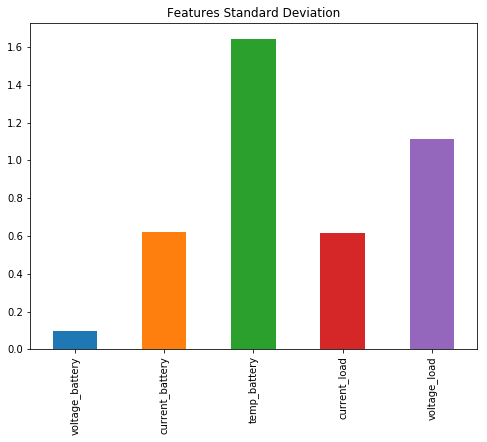

In [8]:
featurs=['voltage_battery','current_battery','temp_battery','current_load','voltage_load']
charge[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

<br><br>

<p>The second data source is the discharge time-series data which consists of <b> battery name, cycle, pressure, dateTime, ambient temperature, voltage_battery, current_battery,Temperature battery, current_load, voltage_load and time.</b></p>
<li>Below, we display the first 5 records in the dataset. A summary of the whole dataset is also provided.</li>

<br><br>





In [9]:
#discharge['Capacity'] = discharge.Capacity.str.replace("'", '').astype(float)
print(discharge.head(5))
discharge.describe()

    Batt_name  cycle            dateTime  amb_temp  voltage_battery  \
0  'B0005_10'      1 2008-04-02 15:25:41        24         4.191492   
1  'B0005_10'      1 2008-04-02 15:25:41        24         4.190749   
2  'B0005_10'      1 2008-04-02 15:25:41        24         3.974871   
3  'B0005_10'      1 2008-04-02 15:25:41        24         3.951717   
4  'B0005_10'      1 2008-04-02 15:25:41        24         3.934352   

   current_battery  temp_battery  voltage_load  current_load    time  \
0        -0.004902     24.330034         0.000       -0.0006   0.000   
1        -0.001478     24.325993         4.206       -0.0006  16.781   
2        -2.012528     24.389085         3.062       -1.9982  35.703   
3        -2.013979     24.544752         3.030       -1.9982  53.781   
4        -2.011144     24.731385         3.011       -1.9982  71.922   

        Capacity  
0   '1.85648742'  
1   '1.85648742'  
2   '1.85648742'  
3   '1.85648742'  
4   '1.85648742'  


,cycle,amb_temp,voltage_battery,current_battery,temp_battery,voltage_load,current_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,3.515268,-1.806032,32.816991,2.308406,1.362700,1546.208924
std,45.699687,0.0,0.231778,0.610502,3.987515,0.800300,1.313698,906.640295
min,1.000000,24.0,2.455679,-2.029098,23.214802,0.000000,-1.998400,0.000000
25%,50.000000,24.0,3.399384,-2.013415,30.019392,2.388000,1.998000,768.563000
50%,88.000000,24.0,3.511664,-2.012312,32.828944,2.533000,1.998200,1537.031000
75%,127.000000,24.0,3.660903,-2.011052,35.920887,2.690000,1.998200,2305.984000
max,168.000000,24.0,4.222920,0.007496,41.450232,4.238000,1.998400,3690.234000


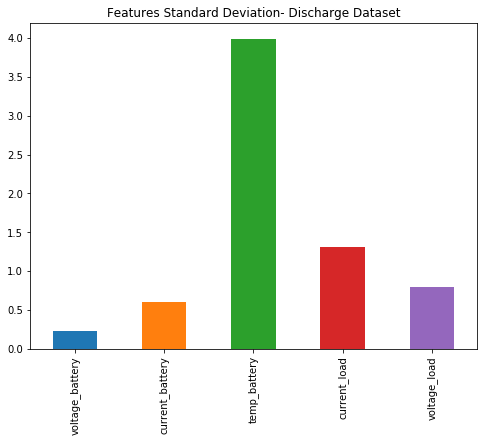

In [10]:
discharge[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation- Discharge Dataset")

<h3> Figure below shows capacity changes of the battery (B5) over the charge-discharge cycles.</h3>

In [11]:
attrib=['Batt_name','cycle','time','Capacity']
dis_ele=dis[attrib]
print(dis_ele.head())
# get ordered list features correlation with regression label ttf
#dis_ele[attrib].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

#dis_ele[attrib].corrwith(dis_ele.Capacity).sort_values(ascending=False)

  Batt_name  cycle      time  Capacity
0  B0005_10      1  3690.234  1.856487
1  B0005_10      2  3672.344  1.846327
2  B0005_10      3  3651.641  1.835349
3  B0005_10      4  3631.563  1.835263
4  B0005_10      5  3629.172  1.834646


Text(0.5, 1.0, 'Discharge B0005')

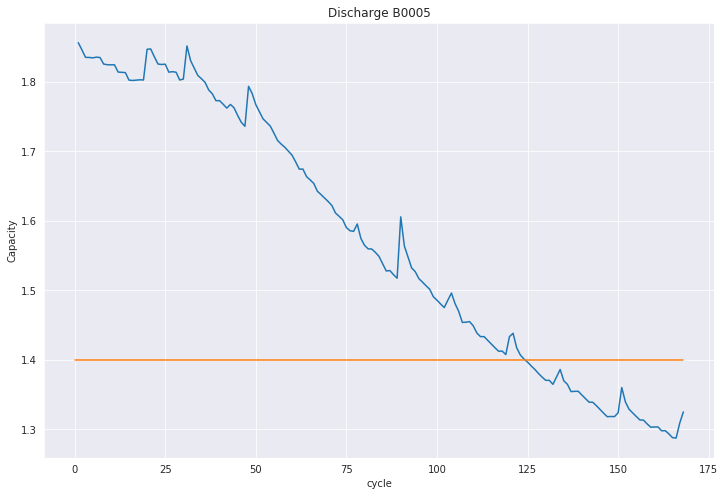

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = dis.loc[(dis['cycle']>=1),['cycle','Capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['Capacity'])
#Draw threshold
plt.plot([0.,len(dis)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

<p>Calculate The state of health of battery No.05:</p>
SOH(τ)=C(τ)/C(0)
<p>where C(0) is the capacity value at the initial stage of Li-ion battery, and C(τ) is the capacity value at time τ (it is usually the index of cycle number).</p>

In [46]:
attrib=['Batt_name','cycle','time','Capacity']
dis_ele=dis[attrib]
C=dis_ele['Capacity'][0]
#print(dis_ele['Capacity'][0])
HoS=0
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['Capacity'])/C
print(dis_ele.head(5))

  Batt_name  cycle      time  Capacity       SoH
0  B0005_10      1  3690.234  1.856487  1.000000
1  B0005_10      2  3672.344  1.846327  0.994527
2  B0005_10      3  3651.641  1.835349  0.988614
3  B0005_10      4  3631.563  1.835263  0.988567
4  B0005_10      5  3629.172  1.834646  0.988235


Text(0.5, 1.0, 'Discharge B0005')

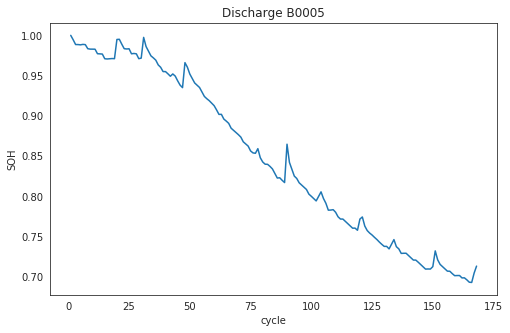

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
#plt.plot([0.,len(dis)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

<h3>Plotting discharge data for B0005<h3>

Text(0.5, 1.0, 'Discharge')

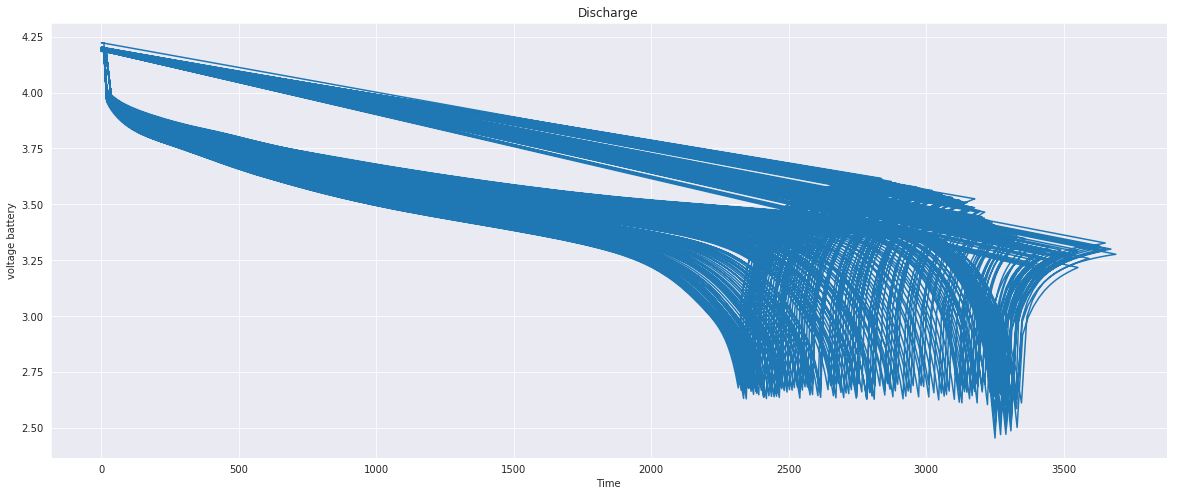

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = discharge.loc[(discharge['cycle']>=1),['time','voltage_battery']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['time'], plot_df['voltage_battery'])
plt.ylabel('voltage battery')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Time')
plt.title('Discharge')

<p>The thrid data source is the impedance time-series data which consists of<b> battery name, cycle, dateTime, ambient temperature, Sense_current, Battery_current, Current_ratio, Battery_impedance, Estimated electrolyte resistance(re) and Estimated charge transfer resistance (rct).</b></p>

<p><li>Below, we display the first 5 records in the dataset. A summary of the whole dataset is also provided.</li></p>

In [97]:
print(imp.tail())
imp.describe()

        Batt_name  cycle                dateTime  amb_temp  \
13339  'B0005_10'    278   '2008-05-27 21:34:28'        24   
13340  'B0005_10'    278   '2008-05-27 21:34:28'        24   
13341  'B0005_10'    278   '2008-05-27 21:34:28'        24   
13342  'B0005_10'    278   '2008-05-27 21:34:28'        24   
13343  'B0005_10'    278   '2008-05-27 21:34:28'        24   

       sense_current_real  sense_current_img  battery_current_real  \
13339          915.489014         -64.045120            230.149506   
13340          916.725525           2.986217            212.188858   
13341          914.619629         126.111481            176.598038   
13342          880.340820         293.825287            136.847626   
13343          801.361816         450.083099             97.058853   

       battery_current_img  current_ratio_real  current_ratio_img  \
13339            91.909889            3.334835          -1.610038   
13340           107.745811            3.440393          -1.732898   

,cycle,amb_temp,sense_current_real,sense_current_img,battery_current_real,battery_current_img,current_ratio_real,current_ratio_img,battery_impedance_real,battery_impedance_img,re,rct
count,13344.000000,13344.0,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000,13344.000000
mean,139.500000,24.0,836.231387,-25.478224,312.818696,-1.958398,2.634386,-0.244941,0.211303,-0.017001,0.054245,0.077340
std,80.254175,0.0,44.703595,92.871311,56.516214,54.800995,0.479906,0.707316,0.047824,0.039477,0.005480,0.006356
min,1.000000,24.0,-1.000000,-121.028297,-1.000000,-106.597794,1.000000,-2.611762,-0.535516,-0.284150,0.043559,0.064883
25%,70.000000,24.0,821.964249,-62.798315,319.091743,-34.719997,2.411979,-0.130184,0.195171,-0.037786,0.049159,0.071464
50%,139.500000,24.0,829.064972,-43.926643,331.967834,-11.365921,2.480312,0.045310,0.205316,-0.004546,0.055850,0.077487
75%,209.000000,24.0,839.067459,-15.116543,340.217415,0.666376,2.589735,0.080907,0.220205,0.002428,0.058820,0.082576
max,278.000000,24.0,926.239258,458.924774,496.963593,159.152161,4.943655,0.650157,0.392987,0.208347,0.063516,0.089757


<h3>Plotting impedance data for B0005- Charge transfer resistance over the number of cycles<h3>

Text(0.5, 1.0, 'impedance')

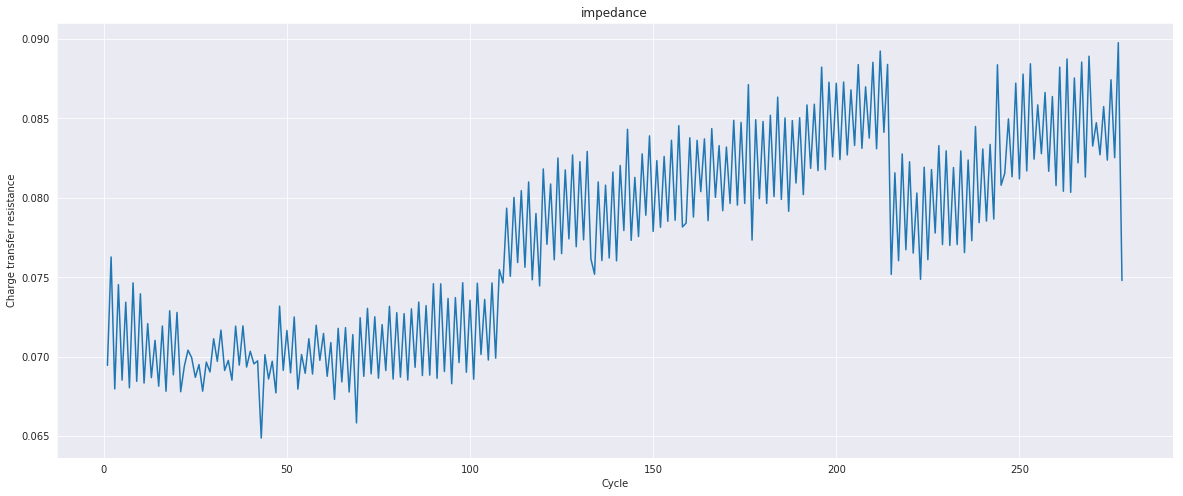

In [17]:
plot_df = imp.loc[(imp['cycle']>=1),['cycle','rct']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['cycle'], plot_df['rct'])
plt.ylabel('Charge transfer resistance')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle')
plt.title('impedance')



<h3>Plotting impedance data for B0005- Estimated electrolyte resistance over the number of cycles<h3>

Text(0.5, 1.0, 'impedance')

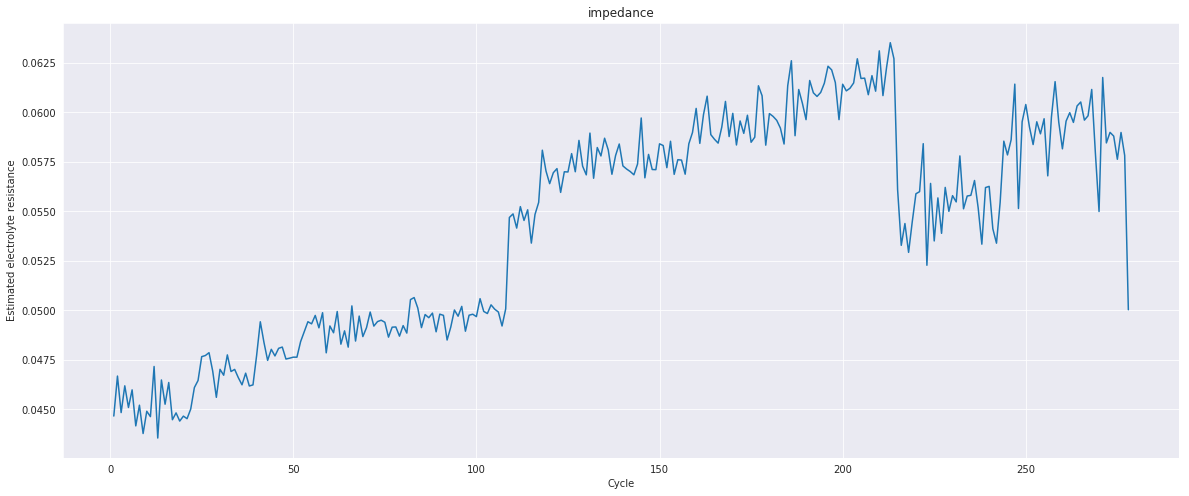

In [18]:
plot_df = imp.loc[(imp['cycle']>=1),['cycle','re']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['cycle'], plot_df['re'])
plt.ylabel('Estimated electrolyte resistance')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle')
plt.title('impedance')

7597.875


Text(0.5, 1.0, 'Discharge B0005 - Orange line: charge and  Blue line: Discharge')

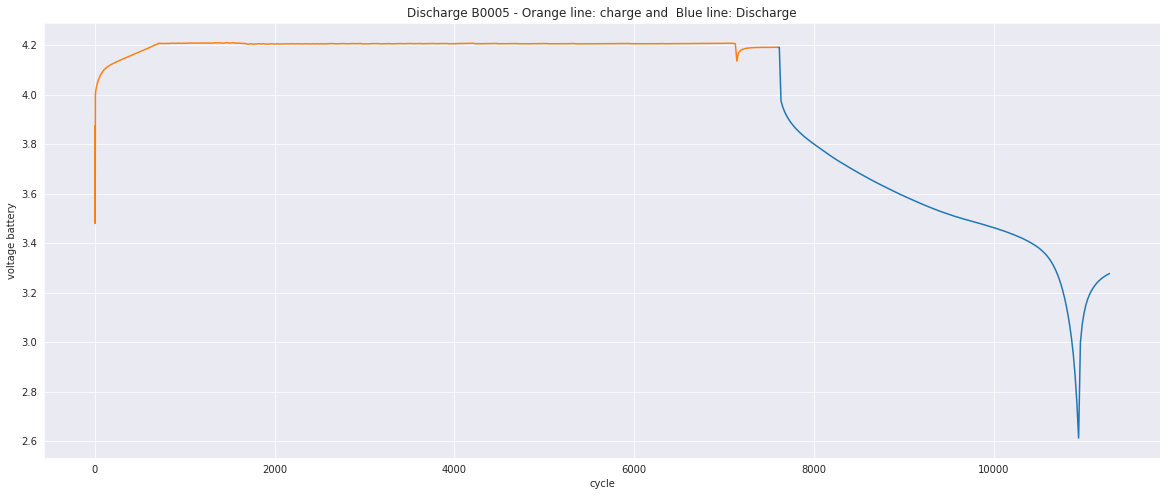

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
time12=charge['time'][788]
print(time12)
#discharge['time']=discharge['time']+time12

plot_df = discharge.loc[(discharge['cycle']==1),['time','voltage_battery']]
plot_charge=charge.loc[(charge['cycle']==1),['time','voltage_battery']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['time'], plot_df['voltage_battery'])
plt.plot(plot_charge['time'], plot_charge['voltage_battery'])
#Draw threshold
#plt.plot(dis['cycle'], dis['limt']) 'g'
plt.ylabel('voltage battery')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('cycle')
plt.title('Discharge B0005 - Orange line: charge and  Blue line: Discharge')

In [20]:
all_data = pd.read_csv('B0005time.csv')

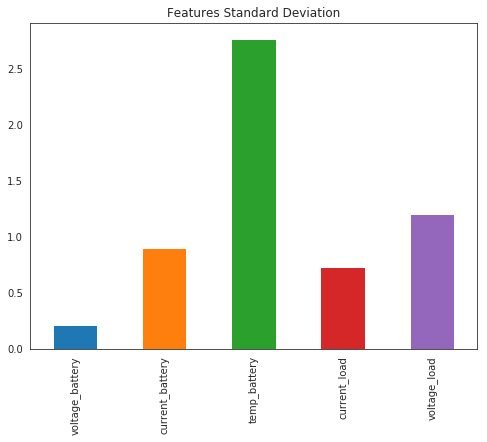

In [104]:
featurs=['voltage_battery','current_battery','temp_battery','current_load','voltage_load','Capacity']
all_data[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")



In [22]:
# get ordered list of top variance features:

featurs_top_var = all_data[featurs].std().sort_values(ascending=False)
featurs_top_var

temp_battery       2.772424
voltage_load       1.208825
current_battery    0.907558
current_load       0.737029
voltage_battery    0.213469
dtype: float64

In [23]:
all_data['dateTime'] = pd.to_datetime(all_data['dateTime'])
all_data['operation']=all_data.operation.str.replace("'", '')
#print(all_data.tail())


<h2>Figure below shows the #5 Li-ion charge and discharge process in one cycle.</h2>
<p>The graph explain the current battery and voltage battery in both charge and discharge operation.</p>

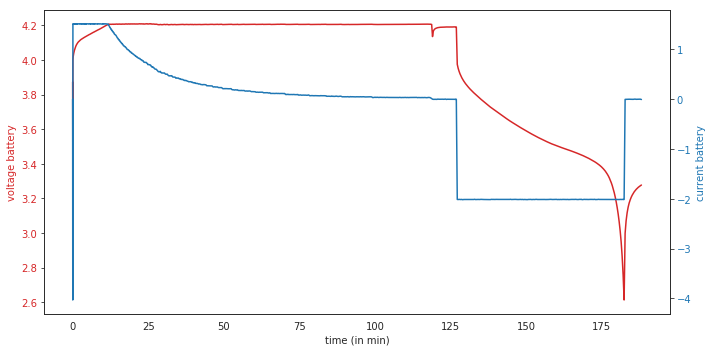

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Create some mock data

fig, ax1 = plt.subplots()
sns.set_style("white")
plot_df= all_data.loc[(all_data['cycle']==1),['time','current_battery']]
#plt.plot([126, 127], color="black")
plot_df1 = all_data.loc[(all_data['cycle']==1),['time','voltage_battery']]

color = 'tab:red'
ax1.set_xlabel('time (in min)')
ax1.set_ylabel('voltage battery', color=color)
ax1.plot(plot_df1['time']/60, plot_df1['voltage_battery'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('current battery', color=color)  # we already handled the x-label with ax1
ax2.plot(plot_df['time']/60, plot_df['current_battery'],'-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
# vertical black line split the graph between charge and discharge operation.

<p style="font-size:16px">The figure below explain<i><u>(the cylces of B0005)</u></i> that after long-term, repeated charges and discharges, the lifetime of the Li-ion battery will be gradually reduced due to some irreversible reactions.</p>

 cycle 10 with color:red
 cycle 100 with color: blue
 cycle 120 with color:green
 cycle 150 with color: black
 cycle 160 with color: orange


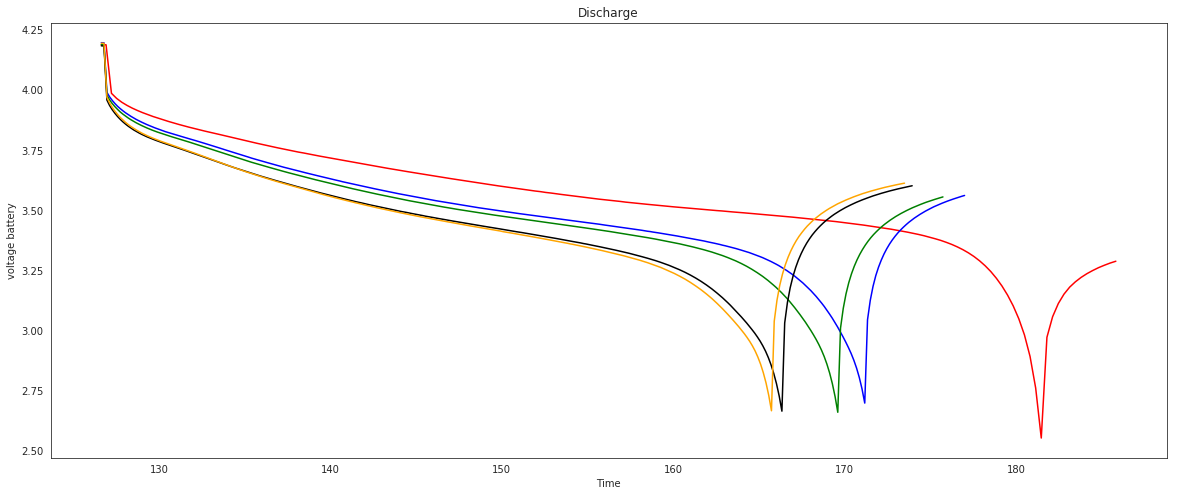

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = discharge.loc[(discharge['cycle']==10),['time','voltage_battery']]
plot_df1 = discharge.loc[(discharge['cycle']==100),['time','voltage_battery']]
plot_df2 = discharge.loc[(discharge['cycle']==120),['time','voltage_battery']]
plot_df3 = discharge.loc[(discharge['cycle']==150),['time','voltage_battery']]
plot_df4 = discharge.loc[(discharge['cycle']==160),['time','voltage_battery']]


sns.set_style("white")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['time']/60, plot_df['voltage_battery'],color='red')
plt.plot(plot_df1['time']/60, plot_df1['voltage_battery'],'-',color='blue')
plt.plot(plot_df2['time']/60, plot_df2['voltage_battery'],color='green')
plt.plot(plot_df3['time']/60, plot_df3['voltage_battery'],'-',color='black')
plt.plot(plot_df4['time']/60, plot_df4['voltage_battery'],color='Orange')


plt.ylabel('voltage battery')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Time')
plt.title('Discharge')
print(" cycle 10 with color:red\n cycle 100 with color: blue\n cycle 120 with color:green\n cycle 150 with color: black\n cycle 160 with color: orange")

After analysing all datasets we find the data is heterogeneous because it is sourced from different batteries that have operated under varying temperature, current, voltage and load condition.
